In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Esse banco de dados já está limpo e já é possivel iniciar uma análise
# Todo o banco de dados foi retirado do site: https://gapminder.org
# Os códigos são embasados em atividades realizadas em aulas
# Os dados são referentes todos ao ano de 2000
# A média do uso de contraceptivos se refere ao percentual de mulheres entre as idades de 15 a 49 anos
# A média dos anos de escolaridades se referam a mulheres entre as idades de 15 a 44 anos

data = pd.read_excel('Base_limpa.xlsx')
data.head()

,2000_IDH,2000_média_uso_contraceptivo_mulheres,2000_fertilidade,2000_média_anos_escola_mulheres,region
Albania,0.662,57.5,2.16,9.8,europe_east
Algeria,0.644,64.0,2.51,5.8,africa_north
Armenia,0.644,60.5,1.30,10.8,europe_east
Azerbaijan,0.642,55.1,2.03,11.0,europe_east
Bangladesh,0.468,54.3,3.12,3.5,asia_west


A pergunta que pretendo responder analisando esse banco de dados é a seguinte: Um alto índice percentual relativo ao uso de contraceptivos está relacionado com um IDH alto?

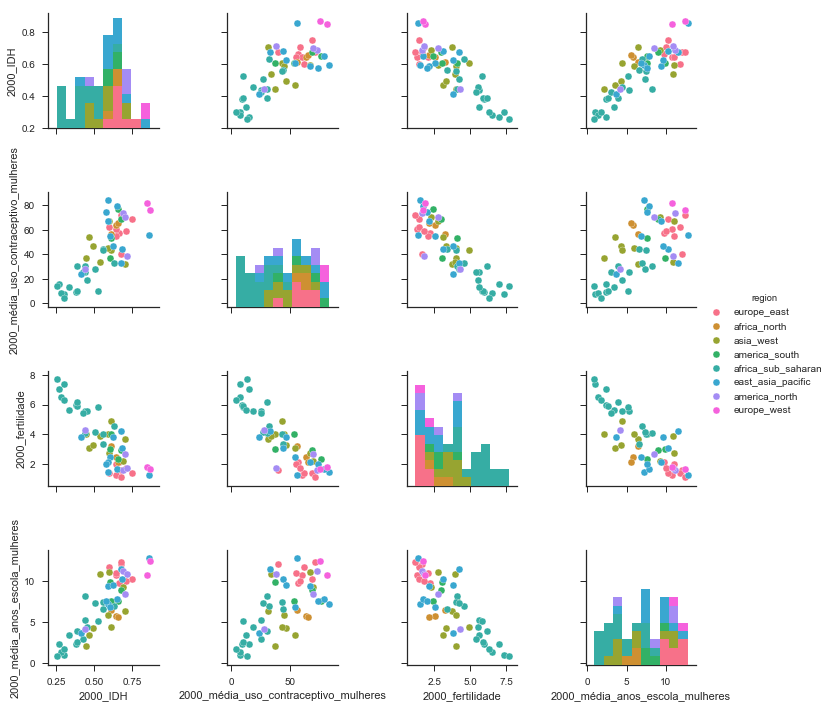

In [3]:
# Primeiramente vamos plotar todos os possiveis gráficos 2 a 2 para visualizar melhor as correlações entre as séries

sns.set(style="ticks")

sns.pairplot(data,hue="region");

Vamos começar a análise observando os gráficos da relação do IDH com a média de uso de contraceptivos e a relação do IDH com a fertilidade

,2000_média_uso_contraceptivo_mulheres,2000_IDH
2000_média_uso_contraceptivo_mulheres,1.000000,0.774907
2000_IDH,0.774907,1.000000


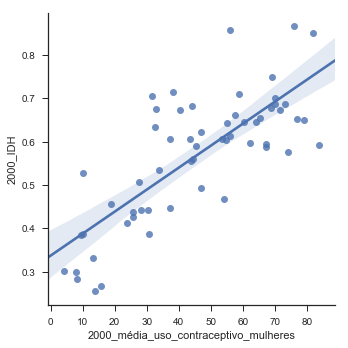

In [15]:
sns.lmplot(x='2000_média_uso_contraceptivo_mulheres',y='2000_IDH',data=data);
data.loc[:,["2000_média_uso_contraceptivo_mulheres","2000_IDH"]].corr()

No gráfico acima observa-se uma forte relação entre o uso percentual de preservativos e o IDH, o índice de correlação entre essas variáveis é de aproximadamente 0.77.

É um forte indício de que a resposta para a pergunta seja sim, contudo é necessário continuar a análise para afirmações mais concretas.

,2000_fertilidade,2000_IDH
2000_fertilidade,1.000000,-0.843113
2000_IDH,-0.843113,1.000000


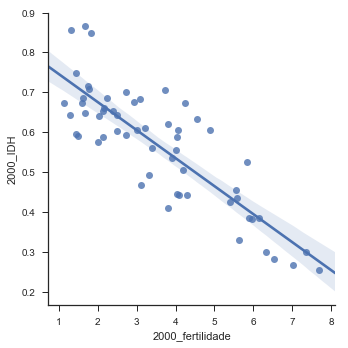

In [6]:
sns.lmplot(x='2000_fertilidade',y='2000_IDH',data=data);
data.loc[:,["2000_fertilidade","2000_IDH"]].corr()

No gráfico acima há uma forte correlação entre o IDH e a fertilidade, com um índice de correlação de -0.84, isso mostra que há uma tendência de que se um país tem baixa fertilidade seu IDH possívelmente é alto.

,2000_fertilidade,2000_média_uso_contraceptivo_mulheres
2000_fertilidade,1.000000,-0.875135
2000_média_uso_contraceptivo_mulheres,-0.875135,1.000000


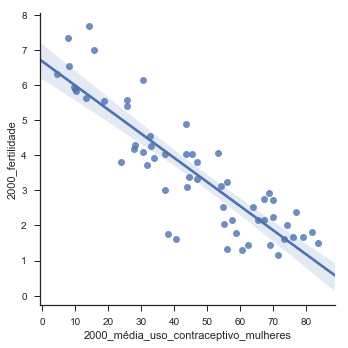

In [16]:
sns.lmplot(x='2000_média_uso_contraceptivo_mulheres',y='2000_fertilidade',data=data);
data.loc[:,["2000_fertilidade","2000_média_uso_contraceptivo_mulheres"]].corr()

No gráfico acima de fertilidade por uso de contraceptivos observamos também uma forte correlação entre as váriaveis e esse índice de correlação é de aproximadamente -0.87.

**Passando pelos gráficos temos que quanto menor a fertilidade verifica-se, sem implicação de causalidade, um maior IDH e aumentando o o uso de contraceptivos verifica-se que a fertilidade diminui, levando a conclusão de que se o índice percentual do uso de contraceptivos é alto num país o IDH é possívelmente alto também.**

Podemos ainda reforçar essa constatação observando da mesma maneira a relação entre o IDH e a escolaridade e a relação entre a escolaridade e o uso de contraceptivos.

,2000_média_anos_escola_mulheres,2000_IDH
2000_média_anos_escola_mulheres,1.000000,0.843568
2000_IDH,0.843568,1.000000


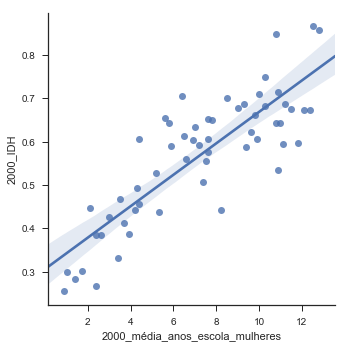

In [17]:
sns.lmplot(x='2000_média_anos_escola_mulheres',y='2000_IDH',data=data);
data.loc[:,["2000_média_anos_escola_mulheres","2000_IDH"]].corr()

No gráfico acima há uma forte correlação entre o IDH e a escolaridade, coeficiente de correlação 0.84, esse resultado já era esperado pois a escolaridade é um dos fatores analisados para o nível do IDH. Contudo, podemos analisar a relação entre a escolaridade e o uso de contraceptivos com o intuito de perceber se há alguma correlação entre essas variáveis e o IDH. 

,2000_média_anos_escola_mulheres,2000_média_uso_contraceptivo_mulheres
2000_média_anos_escola_mulheres,1.000000,0.664649
2000_média_uso_contraceptivo_mulheres,0.664649,1.000000


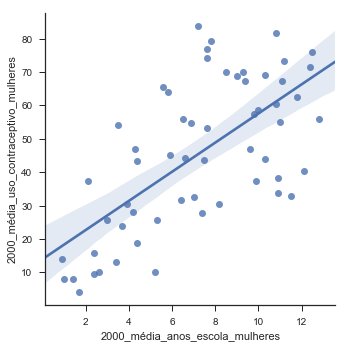

In [20]:
sns.lmplot(x='2000_média_anos_escola_mulheres',y='2000_média_uso_contraceptivo_mulheres',data=data);
data.loc[:,["2000_média_anos_escola_mulheres","2000_média_uso_contraceptivo_mulheres"]].corr()

No gráfico acima a forte correlação entre o uso de preservativos e escolaridade é dado por um coeficiente de correlação de 0.66,
ou seja, quanto maior a escolaridade é observado um uso percentual de preservativos alto, muito provavelmente por um maior acesso a informação e educação. E como observado anteriormente altos níveis de escolaridade e do uso de preservativos são correlacionados fortemente com um IDH alto.

,2000_média_anos_escola_mulheres,2000_fertilidade
2000_média_anos_escola_mulheres,1.000000,-0.809506
2000_fertilidade,-0.809506,1.000000


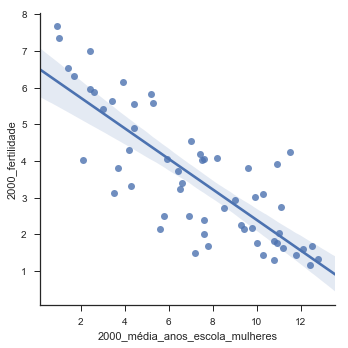

In [21]:
sns.lmplot(x='2000_média_anos_escola_mulheres',y='2000_fertilidade',data=data);
data.loc[:,["2000_média_anos_escola_mulheres","2000_fertilidade"]].corr()

No  gráfico acima a forte correlação entre escolaridade e fertilidade é dada por um coeficiente de correlação de -0.81.

**Por fim tem-se também que se o nível de escolaridade é alto a fertilidade é baixa, isso pode ser constatado, novamente sem afirmar causalidade, pois o acesso a educação e informação faz com que o uso de preservativos seja elevado e quanto mais preservativo é utilizado menor tende a ser a fertilidade, tudo isso levando a um alto IDH. Ou seja, um alto índice percentual relativo ao uso de contraceptivos está SIM relacionado com um IDH alto.**